**Ứng dụng học máy cải thiện lòng trung thành của khách hàng**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Import Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Xử lý dữ liệu

In [ ]:
df = df.drop(['customerID'], axis = 1)

Loại bỏ trường CustomerID vì không có giá trị hữu ích

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

Trường TotalCharges có các giá trị số nhưng đàn ở dạng object nên cần chuyển đổi về numeric.

*errors='coerce'* chuyển đổi các dữ liệu không phải số về giá trị NaN

In [ ]:
df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Xóa các dòng của cột tenure có giá trị là 0

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

Chuyển đổi giá trị SenioCitizen về dạng giá trị số Yes:1, No:0

In [ ]:
df['SeniorCitizen']= df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

Thay các giá trị NaN của cột Totalcharge đã chuyển đổi ở trên bằng giá trị trung bình

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

hàm object_to_int chuyển đổi các giá trị object thành giá trị

In [ ]:
df = df.apply(lambda x: object_to_int(x))

áp dụng hàm object_to_int cho dataset

In [ ]:
#check
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
for col in df.columns:
    print(df[col].value_counts())

gender
1    3549
0    3483
Name: count, dtype: int64
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Partner
0    3639
1    3393
Name: count, dtype: int64
Dependents
0    4933
1    2099
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
PhoneService
1    6352
0     680
Name: count, dtype: int64
MultipleLines
0    3385
2    2967
1     680
Name: count, dtype: int64
InternetService
1    3096
0    2416
2    1520
Name: count, dtype: int64
OnlineSecurity
0    3497
2    2015
1    1520
Name: count, dtype: int64
OnlineBackup
0    3087
2    2425
1    1520
Name: count, dtype: int64
DeviceProtection
0    3094
2    2418
1    1520
Name: count, dtype: int64
TechSupport
0    3472
2    2040
1    1520
Name: count, dtype: int64
StreamingTV
0    2809
2    2703
1    1520
Name: count, dtype: int64
StreamingMovies
0    2781
2    2731
1    1520
Name: count, dtype: int64

# Tạo Test và Train set

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Xây dựng mô hình

## | **Mô hình SVM**

In [ ]:
svm = SVC(kernel='sigmoid', random_state=0, C=0.1)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
y_pred0 = svm.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred))
print (f'Accuracy - : {svm.score(X_test, y_test):.3f}')

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.58      0.45      0.51       561

    accuracy                           0.77      2110
   macro avg       0.70      0.67      0.68      2110
weighted avg       0.75      0.77      0.76      2110

Accuracy - : 0.766


**Nhận xét**

*Precision*
- 0 (No):
- 1 (Yes):

*Recall*
- 0:
- 1:

*F1-scroe*
- 0:
- 1:

*Support*
- 0:
- 1:

*Accuracy*
-



> Đánh giá chung:
- Hiệu suất cao trên lớp 0 (Negative Class): Precision, Recall và F1-score đều khá cao cho lớp 0. Điều này cho thấy mô hình hoạt động tốt trong việc dự đoán lớp 0
- Hiệu suất thấp trên lớp 1 (Positive Class): Precision, Recall và F1-score đều thấp hơn cho lớp 1. Đây là dấu hiệu cho thấy mô hình gặp khó khăn trong việc dự đoán lớp 1.



In [ ]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
# print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.6654514614109038
Accuracy =  0.7658767772511849
F1-score =  0.506


**Đánh giá**

*AUC*
- AUC đánh giá khả năng của mô hình trong việc phân biệt giữa các lớp. AUC = 0.665 cho thấy mô hình có khả năng phân biệt các lớp tốt hơn một mô hình ngẫu nhiên (AUC = 0.5), nhưng không quá mạnh.
- Đây là một chỉ số trung bình, cần cải thiện thêm để có một mô hình tốt hơn.

*Accuracy*
- Mô hình dự đoán đúng 76.6% các trường hợp.
- Đây là một chỉ số khá tốt, nhưng không cho thấy toàn bộ bức tranh, đặc biệt khi dữ liệu có thể không cân bằng.

*F1-score*
- F1-score là trung bình điều hòa giữa Precision và Recall, phản ánh sự cân bằng giữa việc dự đoán chính xác các mẫu thuộc lớp positive và việc bao phủ đầy đủ các mẫu thuộc lớp này. F1-score = 0.506 cho thấy sự cân bằng giữa Precision và Recall không cao.
- Chỉ số này thấp hơn mong đợi và cho thấy mô hình cần cải thiện khả năng nhận diện đúng các mẫu thuộc lớp positive.

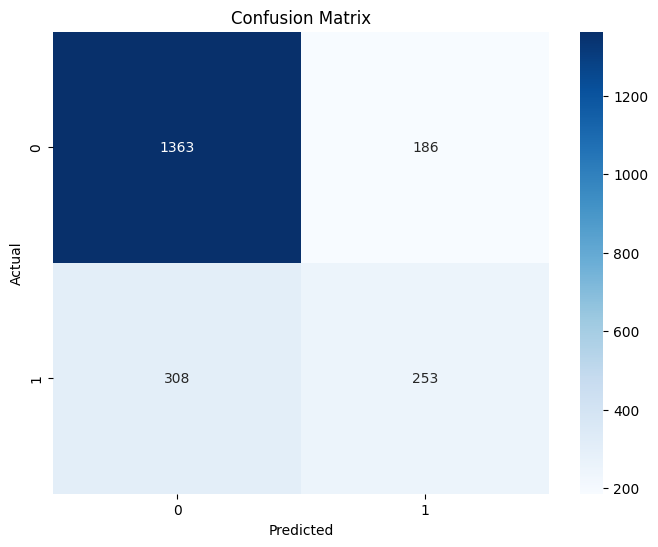

In [ ]:
# Visualize ma trận Confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


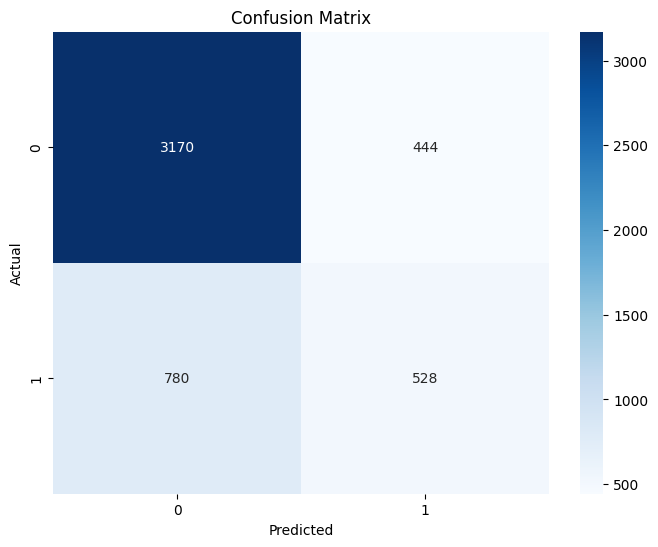

In [ ]:
# Visualize ma trận Confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_pred0), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
param_grid = {'C': [0.1, 0.001, 0.002],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.610 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.621 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.647 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.680 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.626 total time=   0.5s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.698 total time=   0.7s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.721 total time=   0.7s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.669 total time=   0.6s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.673 total time=   0.7s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.691 total time=   0.7s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.734 total time=   0.5s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.002],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.002, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=0.002, gamma=1, kernel='sigmoid')


In [ ]:
svm = SVC(C=0.002, gamma=1, kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1549
           1       0.56      0.01      0.02       561

    accuracy                           0.73      2110
   macro avg       0.65      0.50      0.43      2110
weighted avg       0.69      0.73      0.63      2110



**Đánh giá**

*Hiệu suất của Lớp 0 (Negative Class)*

- Precision 0.74 và Recall 1.00: Mô hình dự đoán chính xác hầu hết các trường hợp là lớp 0, với Precision cao và Recall tuyệt đối (100%).

- F1-score 0.85: Cho thấy mô hình hoạt động rất tốt trên lớp này.

*Hiệu suất của Lớp 1 (Positive Class)*

- Precision 0.56 và Recall 0.01: Mô hình gặp khó khăn lớn trong việc dự đoán các trường hợp thuộc lớp 1. Với Recall rất thấp, chỉ 1% các trường hợp lớp 1 được dự đoán chính xác.
- F1-score 0.02: F1-score rất thấp, cho thấy mô hình không hiệu quả trong việc nhận diện lớp 1.

**Overall**
- Accuracy 0.73: Tỷ lệ chính xác tổng thể là 73%, nhưng điều này không phản ánh đúng khả năng phân loại của mô hình do dữ liệu không cân bằng.
- Macro avg: Các chỉ số trung bình cho thấy sự khác biệt lớn giữa các lớp, với Precision, Recall và F1-score đều thấp cho lớp 1.
- Weighted avg: Các chỉ số có trọng số cũng chỉ ra rằng mô hình chủ yếu đang làm tốt với lớp 0 nhưng không hiệu quả với lớp 1.

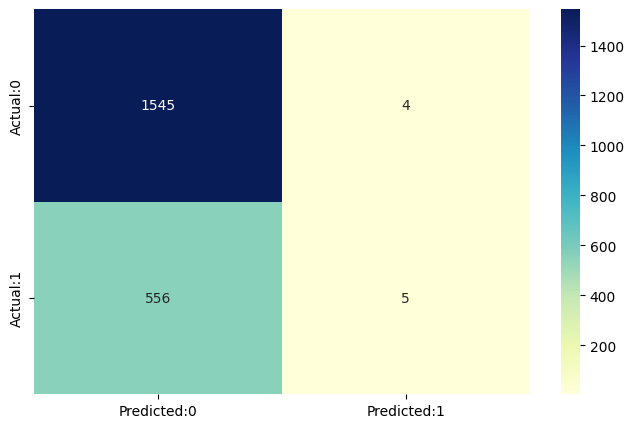

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [ ]:
print('Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Tỷ lệ sai sót = 1-Accuracy =                                 ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =                   ',TP/float(TP+FN),'\n',

'Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =               ',TN/float(TN+FP),'\n',

'Giá trị dự đoán Positive = TP/(TP+FP) =                      ',TP/float(TP+FP),'\n',

'Giá trị dự đoán Negative = TN/(TN+FN) =                      ',TN/float(TN+FN),'\n',

'Tỷ số khả năng Positive = Sensitivity/(1-Specificity) =      ',sensitivity/(1-specificity),'\n',

'Tỷ số khả năng Negative = (1-Sensitivity)/Specificity =      ',(1-sensitivity)/specificity)

Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =        0.7345971563981043 
 Tỷ lệ sai sót = 1-Accuracy =                                  0.2654028436018957 
 Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =                    0.008912655971479501 
 Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =                0.9974176888315042 
 Giá trị dự đoán Positive = TP/(TP+FP) =                       0.5555555555555556 
 Giá trị dự đoán Negative = TN/(TN+FN) =                       0.7353641123274631 
 Tỷ số khả năng Positive = Sensitivity/(1-Specificity) =       3.4514260249553987 
 Tỷ số khả năng Negative = (1-Sensitivity)/Specificity =       0.993653265954808


# Cải thiện trọng số/ Thử với các mô hình khác

## | **Hồi quy Logistic**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print (f'Accuracy - : {logreg.score(X_test, y_test):.3f}')

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110

Accuracy - : 0.809


**Nhận xét:**

*Precision (độ chính xác):*
  - 0 (No) có độ dự đoán khá chính xác với 0.86 (86%)
  - 1 (Yes) có độ dự đoán tương đối, có thể nói là khá thấp chỉ với 0.66 (66%)

*recall*
  - 0:
  - 1:

*f1-score*
  - 0: là điểm trung bình giữa precision và recall, 0.87 cho thấy được hiệu suất tốt
  - 1: với 0.62 có thể đánh giá rằng hiệu suất trên mô hình chưa thực sự hiệu quả

*support*
  - 0: số lượng mẫu = 1549
  - 1: số lượng mẫu = 561

*accuracy*
- Với accuracy = 0.809, mô hình dự đoán đúng 80.9% các trường hợp. Đây có thể là một kết quả tốt, nhưng cần xem xét thêm các yếu tố khác.

In [ ]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
# print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.7368925268329058
Accuracy =  0.8090047393364929
F1-score =  0.618732261116367


**Nhận xét**

*AUC*:
- AUC = 0.736 cho thấy mô hình có khả năng phân biệt các lớp tương đối tốt.
- Mặc dù AUC cao hơn 0.5 là tốt, nhưng cần xem xét thêm các metric khác để có đánh giá toàn diện.
- -> Tốt nhưng có thể không phản ánh đầy đủ hiệu suất nếu dữ liệu không cân bằng

*Accuracy*
- Mô hình dự đoán đúng 80.9% tổng số trường hợp
- Tuy nhiên, không phản ánh được hiệu suất của mô hình trong các trường hợp dữ liệu không cân bằng.
- ->  Khá tốt, cho thấy mô hình có khả năng phân biệt giữa các lớp.

*F1-score*
- F1-score là trung bình điều hòa của Precision và Recall. F1-score = 0.619 cho thấy mô hình cân bằng giữa độ chính xác và độ nhạy.
- -> Tương đối thấp hơn so với Accuracy, có thể do Precision hoặc Recall thấp.

sử dụng GridSearchCV để tìm các siêu tham số tối ưu cho mô hình, tìm kiếm các tham số tốt nhất bằng cách thử nghiệm tất cả các kết hợp có thể của các giá trị tham số bạn cung cấp.

Đánh giá so sánh với mô hình RF

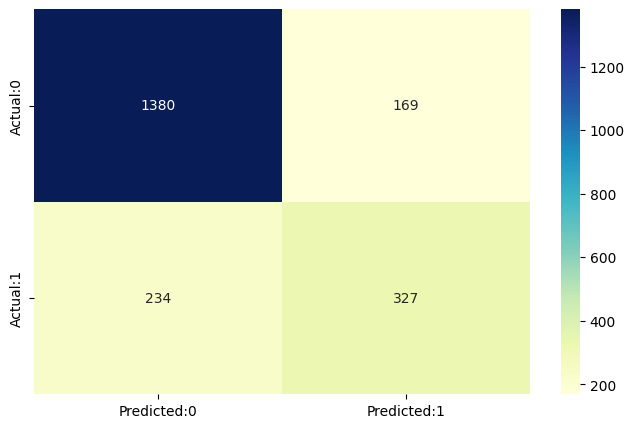

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");

## | **Mô hình RandomForest**

In [ ]:
non_y = len(df[df['Churn']==0])
y = len(df[df['Churn']==1])
ratio = float(y/(non_y+y))

In [ ]:
class_weight = {0:ratio, 1:1-ratio}

In [ ]:
logreg = RandomForestClassifier(class_weight= class_weight)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
logreg = RandomForestClassifier(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
# print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.6976768405583961
Accuracy =  0.7881516587677725
F1-score =  0.558736426456071


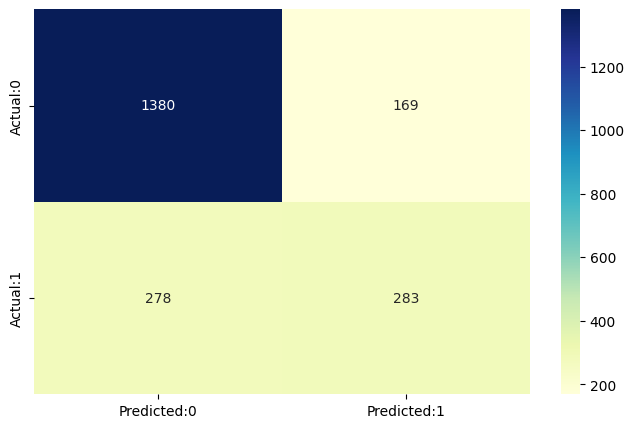

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");

**Đánh giá :** ______



---



**Xử lý dữ liệu không cân bằng**